In [1]:
import numpy as np
from fft_tdse_simulator.simulator import *
from fft_tdse_simulator.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [19]:
x_min = -25.0
x_max = 25.0
nx = 2048

def potential(x):
    V = -0.5 * (x*x + 0.25)**(-.5)
    return V



# def potential(x):
#     V = x*x/2
#     V_cut = 10
#     return V_cut * (V > V_cut) + V * (V < V_cut)



ic| message: 'Dimension set to 1'
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 100.0, self.n_steps: 4000
ic| 'not using guess for ground state ... '


Initial guess: resid = 2459.1416525406567, E = 2731.007784531832
Iteration 0, delta = 1.2806541148070147, resid = 11.181730377211187, E = 1.045691412794766
Iteration 1, delta = 0.5239815279118826, resid = 0.4775510150867052, E = -0.18526660037251313
Iteration 2, delta = 0.35199310967615216, resid = 0.21779748468160828, E = -0.4103730250538095
Iteration 3, delta = 0.20511398338313103, resid = 0.10906913898858982, E = -0.47667747192839993
Iteration 4, delta = 0.10691392159358415, resid = 0.05432214114049318, E = -0.4940882131821446
Iteration 5, delta = 0.05413998776028282, resid = 0.027181562148772775, E = -0.4984912851908744
Iteration 6, delta = 0.027398561207078627, resid = 0.013713827046652529, E = -0.4996099931066351
Iteration 7, delta = 0.013938714095438402, resid = 0.006971287062273344, E = -0.4998979750648493
Iteration 8, delta = 0.00713079428872975, resid = 0.003565657361050915, E = -0.49997304219497374
Iteration 9, delta = 0.003665753183119178, resid = 0.001832912153355147, E = 

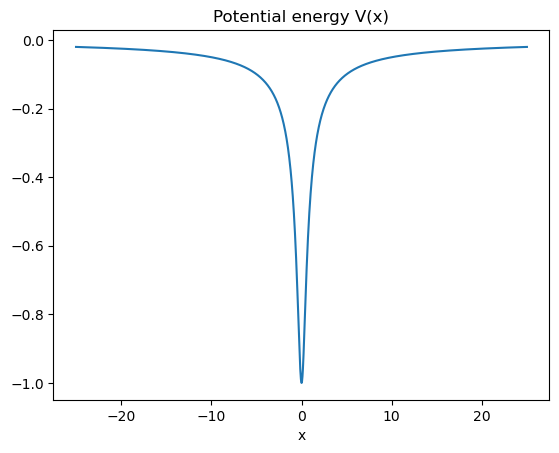

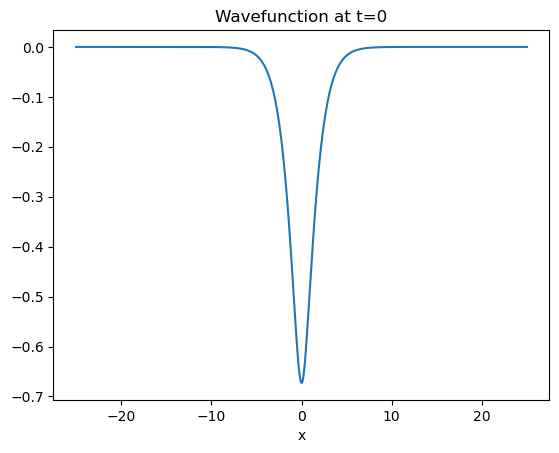

In [21]:
sim = Simulator(verbose=True)
sim.set_dimension(1)
sim.set_potential(potential)
sim.set_grid(x_min, x_max, nx)
sim.set_time_parameters(0.0, 100.0, 4000)
#sim.ground_state_guess =  sim.x * np.exp(-sim.x**2/2)
sim.prepare()
#sim.wf.setPsi(sim.wf.psi * np.exp(1j*sim.x))

plt.figure()
plt.plot(sim.x,potential(sim.x))
plt.xlabel('x')
plt.title('Potential energy V(x)')
plt.show()

plt.figure()
plt.plot(sim.x,sim.psi.real)
plt.xlabel('x')
plt.title('Wavefunction at t=0')
plt.show()


In [ ]:
anim = Animator1d(sim)

anim.set_interval(10)
anim.set_framesize(1024, 768)


anim_callback = anim.get_callback()

def callback(sim):
    anim_callback(sim)
    
sim.simulate(callback=callback)
anim.make_movie("atom_1d_2.mp4")
anim.clean_frames()
